# Análise dos Atributos e Seleção dos Melhores para a Classificação
Essa etapa consiste em analisar o dataset que foi construído a partir da união dos outros e aplicar técnicas de seleção de atributos, a fim de garantir um bom desempenho dos modelos. Primeiramente, foi realizada uma análise exploratória do PLD, seguida de uma primeira filtragem de atributos via matriz de correlação. Em seguida, foram criadas colunas deslocadas de cada atributo (1 a 52 semanas), que foram submetidas a um teste ANOVA para a seleção dos melhores atributos para a predição. Enfim, foram criadas as classes para o dataset e o dataframe resultante foi exportado

### Importando biblioteca e dados

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [20]:
df = pd.read_csv("dataset_final.csv", index_col=0)
df

,Ano_sem,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,NORDESTE
0,2001_26,49967.000000,86275.000000,24.665715,2249.714286,50.405714,2249.714286,50.405714,4375.261310,0.000000,0.000000,73833.200000,623.600000,684.00
1,2001_27,49967.000000,83856.000000,23.975714,2106.142857,55.701429,2106.142857,55.701429,4412.041071,0.000000,0.000000,74050.600000,703.614286,684.00
2,2001_28,49967.000000,80822.000000,23.107143,1930.857143,51.065715,1930.857143,51.065715,4509.325595,0.000000,0.000000,75838.128571,1327.857143,684.00
3,2001_29,49967.000000,78341.000000,22.397143,2048.000000,54.162857,2048.000000,54.162857,4514.443452,0.000000,0.000000,75816.857143,1661.885714,684.00
4,2001_30,49967.000000,75390.000000,21.555714,1889.285714,49.965714,1889.285714,49.965714,4501.846429,0.000000,0.000000,74977.385714,1620.242857,684.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2024_5,51691.226562,201481.154297,55.682614,9913.562919,71.678028,9645.437988,69.732571,13178.423238,262558.154429,65523.037143,80322.126857,11214.320000,61.07
1199,2024_6,51691.226562,208488.951172,57.619328,7938.018415,55.751185,7937.916295,55.750471,13538.342220,266225.501429,61161.282571,75509.690571,10506.389429,61.07
1200,2024_7,51691.226562,216617.564453,59.865815,9476.926618,66.559414,9452.106027,66.385099,12930.942446,172968.497571,64295.605143,83487.074571,10231.560714,61.07
1201,2024_8,51691.226562,226541.818359,62.608529,11194.694754,78.623812,10893.537946,76.508686,13083.830208,126292.280000,55369.596571,100146.512714,10036.468571,61.60


In [21]:
df = df.rename(columns={'NORDESTE': 'PLD'})
df

,Ano_sem,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,PLD
0,2001_26,49967.000000,86275.000000,24.665715,2249.714286,50.405714,2249.714286,50.405714,4375.261310,0.000000,0.000000,73833.200000,623.600000,684.00
1,2001_27,49967.000000,83856.000000,23.975714,2106.142857,55.701429,2106.142857,55.701429,4412.041071,0.000000,0.000000,74050.600000,703.614286,684.00
2,2001_28,49967.000000,80822.000000,23.107143,1930.857143,51.065715,1930.857143,51.065715,4509.325595,0.000000,0.000000,75838.128571,1327.857143,684.00
3,2001_29,49967.000000,78341.000000,22.397143,2048.000000,54.162857,2048.000000,54.162857,4514.443452,0.000000,0.000000,75816.857143,1661.885714,684.00
4,2001_30,49967.000000,75390.000000,21.555714,1889.285714,49.965714,1889.285714,49.965714,4501.846429,0.000000,0.000000,74977.385714,1620.242857,684.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2024_5,51691.226562,201481.154297,55.682614,9913.562919,71.678028,9645.437988,69.732571,13178.423238,262558.154429,65523.037143,80322.126857,11214.320000,61.07
1199,2024_6,51691.226562,208488.951172,57.619328,7938.018415,55.751185,7937.916295,55.750471,13538.342220,266225.501429,61161.282571,75509.690571,10506.389429,61.07
1200,2024_7,51691.226562,216617.564453,59.865815,9476.926618,66.559414,9452.106027,66.385099,12930.942446,172968.497571,64295.605143,83487.074571,10231.560714,61.07
1201,2024_8,51691.226562,226541.818359,62.608529,11194.694754,78.623812,10893.537946,76.508686,13083.830208,126292.280000,55369.596571,100146.512714,10036.468571,61.60


### Análise Exploratória

Verificando nulos e NaN

In [22]:
df.isnull().sum()

Ano_sem                                 0
ear_max_subsistema                      0
ear_verif_subsistema_mwmes              0
ear_verif_subsistema_percentual         0
ena_bruta_regiao_mwmed                  0
ena_bruta_regiao_percentualmlt          0
ena_armazenavel_regiao_mwmed            0
ena_armazenavel_regiao_percentualmlt    0
val_cargaenergiamwmed                   0
EOLIELÉTRICA                            0
FOTOVOLTAICA                            0
HIDROELÉTRICA                           0
TÉRMICA                                 0
PLD                                     0
dtype: int64

In [23]:
df.isna().sum()

Ano_sem                                 0
ear_max_subsistema                      0
ear_verif_subsistema_mwmes              0
ear_verif_subsistema_percentual         0
ena_bruta_regiao_mwmed                  0
ena_bruta_regiao_percentualmlt          0
ena_armazenavel_regiao_mwmed            0
ena_armazenavel_regiao_percentualmlt    0
val_cargaenergiamwmed                   0
EOLIELÉTRICA                            0
FOTOVOLTAICA                            0
HIDROELÉTRICA                           0
TÉRMICA                                 0
PLD                                     0
dtype: int64

Resumo dos dados numéricos

In [24]:
df.describe()

,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,PLD
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000
mean,51444.418693,190676.078537,53.012662,5473.005111,67.448731,5282.878657,65.732922,8805.055000,59014.566076,6077.190555,104327.816845,31103.981407,164.513608
std,680.958166,91668.080469,25.406819,4707.521956,30.858333,4322.320096,28.778372,2052.409629,83470.246629,13766.614426,37321.567749,31906.617977,189.783171
min,49967.000000,7524.000000,4.401429,689.714286,12.817143,641.714286,12.302857,4375.261310,0.000000,0.000000,35930.322429,33.795714,4.000000
25%,51602.070312,117673.924805,32.757143,2139.257629,44.823572,2125.889134,44.235714,7074.768810,200.001429,0.000000,77748.179070,5121.787143,23.555000
50%,51766.000000,191875.765625,53.200000,3562.062430,62.815715,3540.550537,62.585716,8956.732650,7362.509143,0.000000,101123.275714,15275.117571,80.480000
75%,51809.000000,266471.585938,73.788478,7233.492885,84.701428,7122.385951,83.440000,10356.407620,104258.243786,5717.547571,136387.282643,56771.860643,222.700000
max,52624.082031,359797.000000,99.292856,28610.000000,207.692856,22756.714286,206.412857,13783.216845,367056.128000,68335.822714,188774.170000,120903.901857,822.830000


Através do boxplot abaixo, nota-se que o PLD possui muitos outliers. Isso põe em dúvida qual valor de limite utilizar para separar as classes

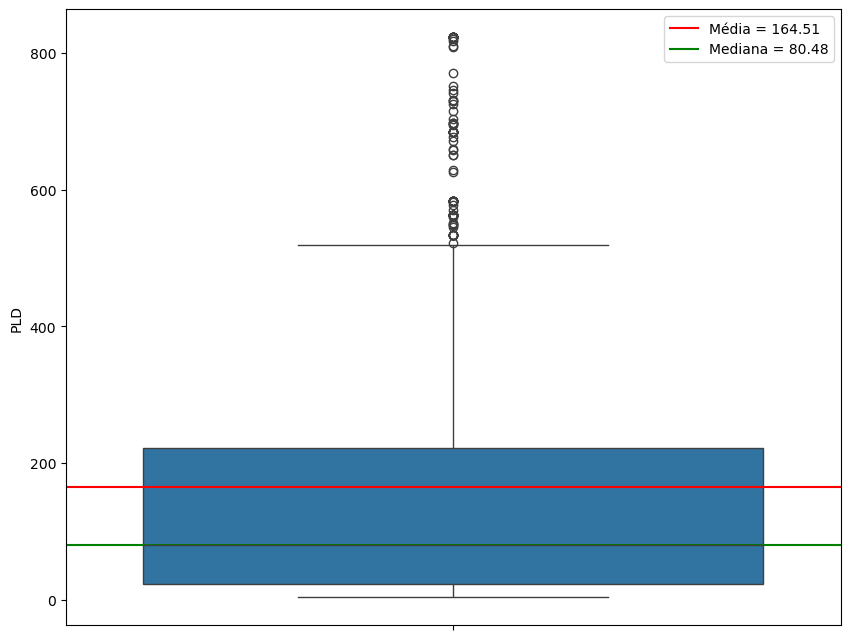

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.PLD)
plt.axhline(y=df.PLD.mean(), color='red', label=f"Média = {df.PLD.mean():.2f}")
plt.axhline(y=df.PLD.median(), color='green', label=f"Mediana = {df.PLD.median():.2f}")
plt.legend()

Pelo histograma do PLD, é perceptível uma grande concentração de valores mais baixos. Sendo assim, as classes provavelmente serão bastante desbalanceadas

<Axes: title={'center': 'Histograma do PLD'}, xlabel='PLD', ylabel='Count'>

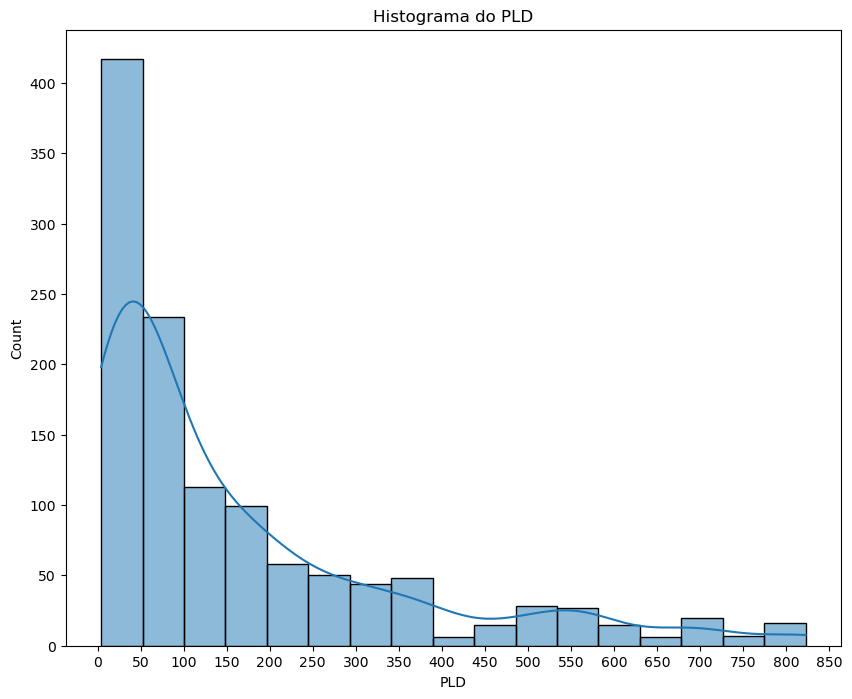

In [26]:
plt.figure(figsize=(10, 8))
plt.title("Histograma do PLD")
plt.xticks(range(0, 900, 50))
sns.histplot(df.PLD, kde=True, bins=17)

### Seleção de Atributos: Matriz de correlação

Foi gerada uma matriz de correlação dos atributos. Atributos com correlaçao muito próxima de 1 podem ser redundantes para os algoritmos. Além disso, é possível identificar variáveis que não interferem muito no pld, como a geraçao eólica

<Axes: title={'center': 'Matriz de Correlação dos Atributos'}>

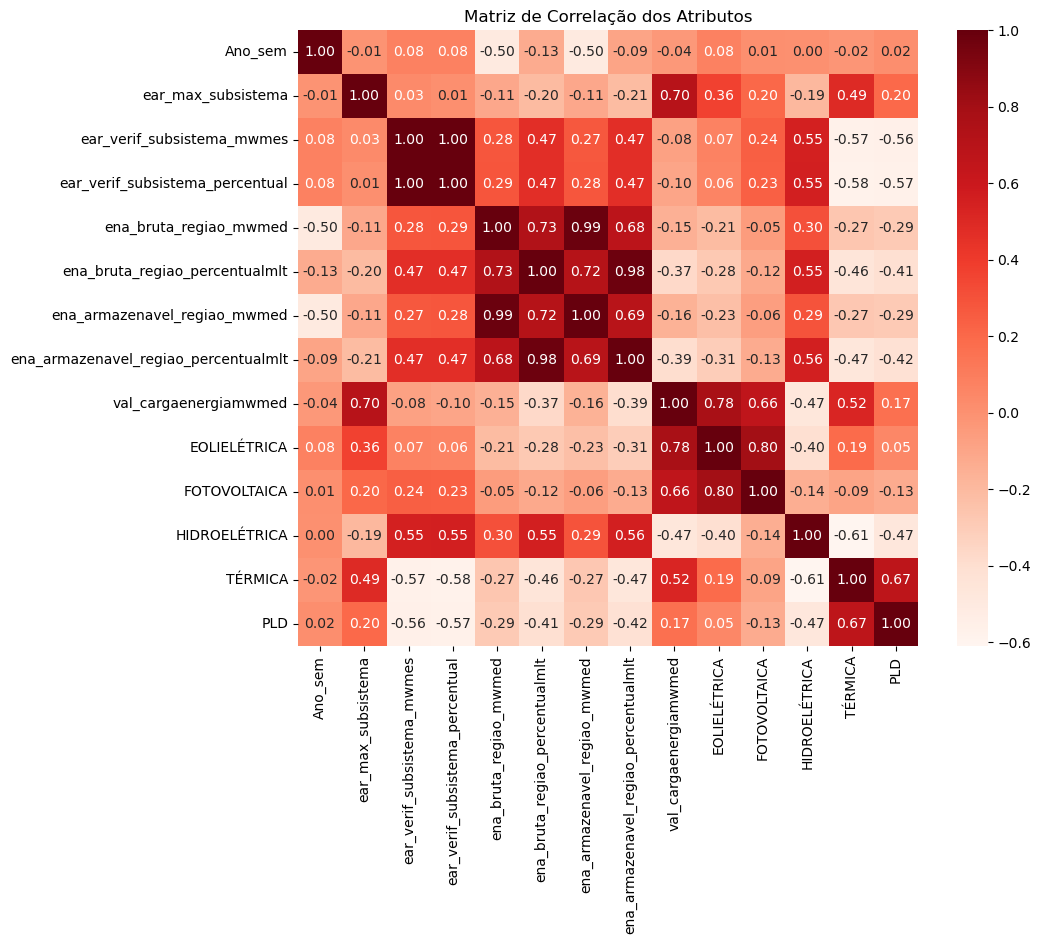

In [27]:
plt.figure(figsize=(10, 8))
plt.title("Matriz de Correlação dos Atributos")
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Reds')

## Seleção de Atributos: Colunas atrasadas no tempo
Além dos deslocamento dos atributos, nota-se que também é importante realizar o deslocamento do próprio valor do PLD. Primeiramente, faz-se um deslocamento "para trás", a fim da classificação ser realizada para valores futuros, em vez da semana atual. O tamanho do deslocamento definirá quantas semanas à frente será realizado a predição. Inicialmente, faz-se com uma semana à frente.

Além disso, também surgiu a curiosidade de fazer o deslocamento do pld igual é feito com os outros atributos, para que a própria série histórica do PLD seja utilizada como base para a predição, fato que acontece na predição de séries univariadas.

In [28]:
# Deslocando o PLD para uma semana à frente
df_x = df.copy()
df_x["PLD"] = df.PLD.shift(-1)
df_x.drop(df.index[-1], inplace=True)
df_x.drop(["Ano_sem"], axis=1,inplace=True)
df_x

,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,TÉRMICA,PLD
0,49967.000000,86275.000000,24.665715,2249.714286,50.405714,2249.714286,50.405714,4375.261310,0.000000,0.000000,73833.200000,623.600000,684.00
1,49967.000000,83856.000000,23.975714,2106.142857,55.701429,2106.142857,55.701429,4412.041071,0.000000,0.000000,74050.600000,703.614286,684.00
2,49967.000000,80822.000000,23.107143,1930.857143,51.065715,1930.857143,51.065715,4509.325595,0.000000,0.000000,75838.128571,1327.857143,684.00
3,49967.000000,78341.000000,22.397143,2048.000000,54.162857,2048.000000,54.162857,4514.443452,0.000000,0.000000,75816.857143,1661.885714,684.00
4,49967.000000,75390.000000,21.555714,1889.285714,49.965714,1889.285714,49.965714,4501.846429,0.000000,0.000000,74977.385714,1620.242857,684.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,51691.226562,192740.753906,53.267058,10134.883440,75.188229,10041.933664,74.498656,13205.257976,136620.860714,51715.226429,82213.850857,9848.665714,61.07
1198,51691.226562,201481.154297,55.682614,9913.562919,71.678028,9645.437988,69.732571,13178.423238,262558.154429,65523.037143,80322.126857,11214.320000,61.07
1199,51691.226562,208488.951172,57.619328,7938.018415,55.751185,7937.916295,55.750471,13538.342220,266225.501429,61161.282571,75509.690571,10506.389429,61.07
1200,51691.226562,216617.564453,59.865815,9476.926618,66.559414,9452.106027,66.385099,12930.942446,172968.497571,64295.605143,83487.074571,10231.560714,61.60


Utiliza a função shift para deslocar os atributos. Além disso, foi realizado um tratamento para renomear as novas colunas. o sufixo após o '_' refere-se a quantas semanas atrasadas a coluna está

In [29]:
cont = np.arange(start=1, stop=53, step=1)
columns = df_x.columns
df_shifted = df_x.copy()
for i in cont:
    shift = df_x.shift(i) # faz o deslocamento das variaveis
    shift.columns = columns + "_" + str(i)  # cria o nome para as colunas novas
    df_shifted = df_shifted.merge(shift, how='left', left_index=True, right_index=True) # une o dataset com cada um de seus lags
df_shifted

,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt,val_cargaenergiamwmed,EOLIELÉTRICA,FOTOVOLTAICA,...,ena_bruta_regiao_mwmed_52,ena_bruta_regiao_percentualmlt_52,ena_armazenavel_regiao_mwmed_52,ena_armazenavel_regiao_percentualmlt_52,val_cargaenergiamwmed_52,EOLIELÉTRICA_52,FOTOVOLTAICA_52,HIDROELÉTRICA_52,TÉRMICA_52,PLD_52
0,49967.000000,86275.000000,24.665715,2249.714286,50.405714,2249.714286,50.405714,4375.261310,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49967.000000,83856.000000,23.975714,2106.142857,55.701429,2106.142857,55.701429,4412.041071,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49967.000000,80822.000000,23.107143,1930.857143,51.065715,1930.857143,51.065715,4509.325595,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49967.000000,78341.000000,22.397143,2048.000000,54.162857,2048.000000,54.162857,4514.443452,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49967.000000,75390.000000,21.555714,1889.285714,49.965714,1889.285714,49.965714,4501.846429,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,51691.226562,192740.753906,53.267058,10134.883440,75.188229,10041.933664,74.498656,13205.257976,136620.860714,51715.226429,...,2171.150600,65.941243,2164.000523,65.724086,11874.027399,316559.739143,52307.632286,86951.361714,9866.371857,69.04
1198,51691.226562,201481.154297,55.682614,9913.562919,71.678028,9645.437988,69.732571,13178.423238,262558.154429,65523.037143,...,2233.911447,67.847384,2229.110700,67.701584,11469.914911,280477.544143,45134.014429,86261.112857,9186.965571,69.04
1199,51691.226562,208488.951172,57.619328,7938.018415,55.751185,7937.916295,55.750471,13538.342220,266225.501429,61161.282571,...,2061.867118,62.622143,2061.867118,62.622143,12302.205268,224575.290286,56439.749000,91878.851286,8878.758000,69.04
1200,51691.226562,216617.564453,59.865815,9476.926618,66.559414,9452.106027,66.385099,12930.942446,172968.497571,64295.605143,...,2039.792690,65.113171,2034.889840,64.964271,12370.967774,242248.639286,52500.745714,86333.919286,9259.955000,69.04


In [30]:
df_shifted.isna().sum() # Contabiliza a nova quantidade de nulos, ocasionada pelos lags

ear_max_subsistema                  0
ear_verif_subsistema_mwmes          0
ear_verif_subsistema_percentual     0
ena_bruta_regiao_mwmed              0
ena_bruta_regiao_percentualmlt      0
                                   ..
EOLIELÉTRICA_52                    52
FOTOVOLTAICA_52                    52
HIDROELÉTRICA_52                   52
TÉRMICA_52                         52
PLD_52                             52
Length: 689, dtype: int64

In [31]:
# Remove as primeiras colunas, por conta dos valores NaN
df_shifted = df_shifted.iloc[52:]
df_shifted_x = df_shifted.drop(["PLD"], axis=1)
df_shifted_y = df_shifted["PLD"]

### Teste ANOVA para seleção dos melhores atributos

In [37]:
# Testando o SelectKBest para selecionar as melhores variáveis
anova_selector = SelectKBest(score_func=f_classif, k=15)  # Seleciona os 15 melhores atributos
X_selected = anova_selector.fit_transform(df_shifted_x, df_shifted_y)

ind_melhores_atributos = anova_selector.get_support(indices=True)
print("Atributos selecionados:", ind_melhores_atributos)

Atributos selecionados: [214 227 240 253 266 279 305 318 383 396 630 643 656 669 682]


In [38]:
#lista os atributos selecionados
for i in ind_melhores_atributos:
    print(df_shifted_x.columns[i])

val_cargaenergiamwmed_16
val_cargaenergiamwmed_17
val_cargaenergiamwmed_18
val_cargaenergiamwmed_19
val_cargaenergiamwmed_20
val_cargaenergiamwmed_21
val_cargaenergiamwmed_23
val_cargaenergiamwmed_24
val_cargaenergiamwmed_29
val_cargaenergiamwmed_30
val_cargaenergiamwmed_48
val_cargaenergiamwmed_49
val_cargaenergiamwmed_50
val_cargaenergiamwmed_51
val_cargaenergiamwmed_52


Cria um dataset que seleciona os atributos mais relevantes, de acordo com o teste ANOVA

In [34]:
X_values = df_shifted_x.iloc[:, ind_melhores_atributos]
y_values = df_shifted_y.copy()
X_values.reset_index(drop=True, inplace=True)
y_values.reset_index(drop=True, inplace=True) # reseta o index para evitar problemas

In [35]:
# Cria as classes de acordo com a faixa de preço. Os limiares estão presentes no vetor lim. os preços variam de muito baixo a muito alto
lim = [50, 90, 150, 450]
classes = y_values.apply(lambda x: "muito_baixo" if x < lim[0] else
                       "baixo" if x >= lim[0] and x < lim[1] else
                       "medio" if x >= lim[1] and x < lim[2] else
                       "alto" if x >= lim[2] and x < lim[3] else
                       "muito_alto")

df_classes = X_values.copy()
df_classes["Class"] = classes
df_classes

,val_cargaenergiamwmed_16,val_cargaenergiamwmed_17,val_cargaenergiamwmed_18,val_cargaenergiamwmed_19,val_cargaenergiamwmed_20,val_cargaenergiamwmed_21,val_cargaenergiamwmed_23,val_cargaenergiamwmed_24,val_cargaenergiamwmed_29,val_cargaenergiamwmed_30,val_cargaenergiamwmed_48,val_cargaenergiamwmed_49,val_cargaenergiamwmed_50,val_cargaenergiamwmed_51,val_cargaenergiamwmed_52,Class
0,5450.791113,5613.541607,5558.509601,5551.659048,5509.001012,5243.035000,5529.452976,5255.040655,5038.486429,5001.776905,4501.846429,4514.443452,4509.325595,4412.041071,4375.261310,muito_baixo
1,5564.626190,5450.791113,5613.541607,5558.509601,5551.659048,5509.001012,5520.950476,5529.452976,5086.663690,5038.486429,4500.160119,4501.846429,4514.443452,4509.325595,4412.041071,muito_baixo
2,4826.431012,5564.626190,5450.791113,5613.541607,5558.509601,5551.659048,5243.035000,5520.950476,5118.060357,5086.663690,4541.493452,4500.160119,4501.846429,4514.443452,4509.325595,muito_baixo
3,5588.378869,4826.431012,5564.626190,5450.791113,5613.541607,5558.509601,5509.001012,5243.035000,4812.976131,5118.060357,4576.285714,4541.493452,4500.160119,4501.846429,4514.443452,muito_baixo
4,5518.945774,5588.378869,4826.431012,5564.626190,5450.791113,5613.541607,5551.659048,5509.001012,4955.326615,4812.976131,4651.471429,4576.285714,4541.493452,4500.160119,4501.846429,muito_baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,12774.793351,12906.990327,12783.699065,13151.684208,13446.444226,13113.547607,13666.881958,13229.467929,11888.059077,12522.100365,11704.110327,12370.967774,12302.205268,11469.914911,11874.027399,baixo
1146,12916.112714,12774.793351,12906.990327,12783.699065,13151.684208,13446.444226,13685.761357,13666.881958,12073.695363,11888.059077,12196.111155,11704.110327,12370.967774,12302.205268,11469.914911,baixo
1147,13180.121482,12916.112714,12774.793351,12906.990327,12783.699065,13151.684208,13113.547607,13685.761357,11401.599869,12073.695363,12548.635167,12196.111155,11704.110327,12370.967774,12302.205268,baixo
1148,13130.633119,13180.121482,12916.112714,12774.793351,12906.990327,12783.699065,13446.444226,13113.547607,11773.045071,11401.599869,12900.345042,12548.635167,12196.111155,11704.110327,12370.967774,baixo


### Exportando dataset tratado

In [36]:
df_classes.to_csv("dataset_modelo.csv")